# Машинное обучение. Анализ данных с помощью инструментов Python (анализ аудиоданных)

##Основы библиотеки librosa

In [ ]:
! pip install librosa

In [ ]:
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import sklearn

[документация по librosa](https://librosa.org/doc/main/tutorial.html)

In [ ]:
audio_data = '/content/pop.00016.wav'
x, sr = librosa.load(audio_data)
print(type(x), type(x[1]), type(sr))
print(x.shape, sr)


<class 'numpy.ndarray'> <class 'numpy.float32'> <class 'int'>
(661504,) 22050


In [ ]:
ipd.Audio(audio_data)

In [ ]:
import librosa.display

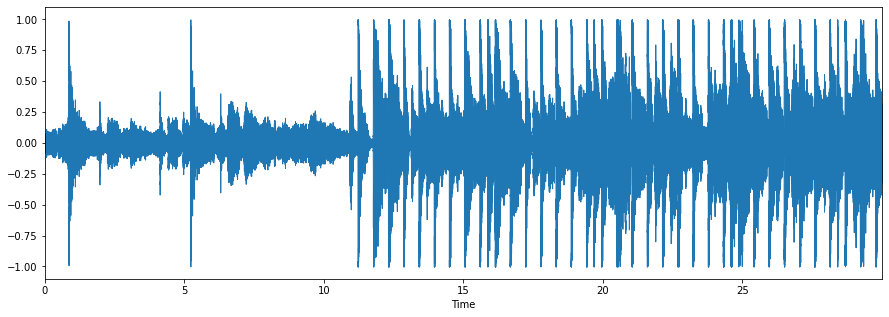

In [ ]:
plt.figure(figsize=(15, 5))
librosa.display.waveplot(x, sr=sr)

**Спектрограмма** — это визуальный способ представления уровня или «громкости» сигнала во времени на различных частотах, присутствующих в форме волны.

(1025, 1293)


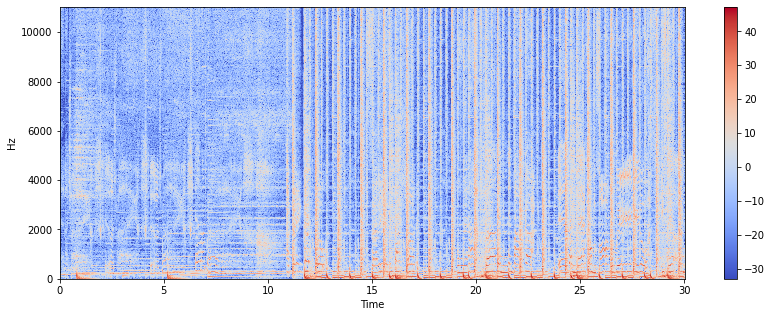

In [ ]:
# тепловая карта (один из способов отображения спектра)

X = librosa.stft(x) #кратковременное преобразование Фурье для определения амплитуд
X_db = librosa.amplitude_to_db(abs(X))
print(X_db.shape)
# тепловая карта (один из способов отображения спектра)
plt.figure(figsize=(14, 5))
# На вертикальной оси - частоты (от 0 до 10 кГц), а на горизонтальной — время.
librosa.display.specshow(X_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

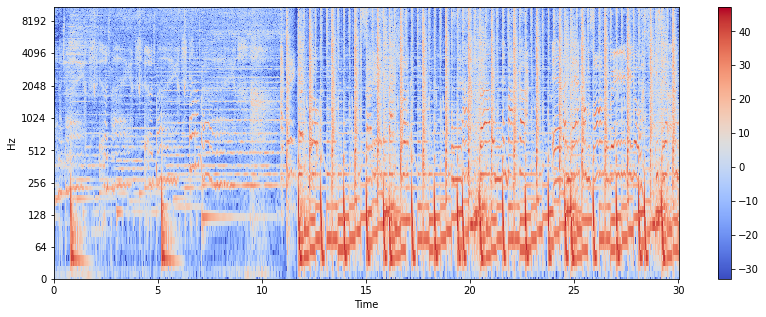

In [ ]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(X_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

##Извлечение признаков из аудио сигнала

[Модуль извлечения признаков](https://librosa.org/doc/main/feature.html)

1 **Спектральный центроид** 

**librosa.feature.spectral_centroid** вычисляет спектральный центроид 

(1293, 1)
30.00018140589569


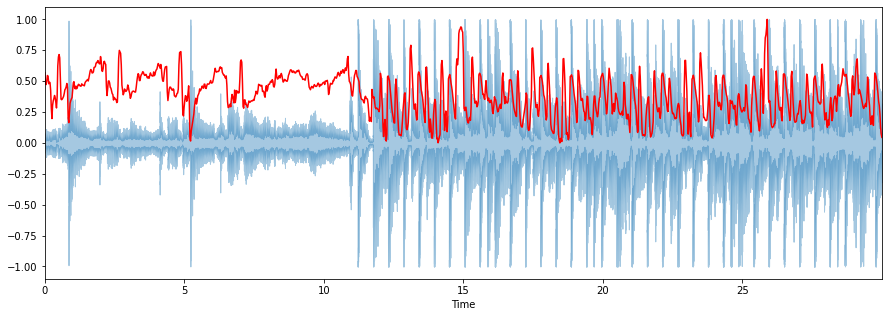

In [ ]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr).T 
print(spectral_centroids.shape)

plt.figure(figsize=(15, 5))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
print(t[-1])
# Нормализация спектрального центроида для визуализации
spectral_centroids_norm = sklearn.preprocessing.minmax_scale(spectral_centroids, axis=0)

# Построение спектрального центроида вместе с формой волны
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, spectral_centroids_norm, color='r')

2 **Спектральный спад** - мера формы сигнала, представляющая собой частоту, в которой высокие частоты снижаются до 0. Чтобы получить ее, нужно рассчитать долю элементов в спектре мощности, где 85% ее мощности находится на более низких частотах.

**librosa.feature.spectral_rolloff** вычисляет частоту спада

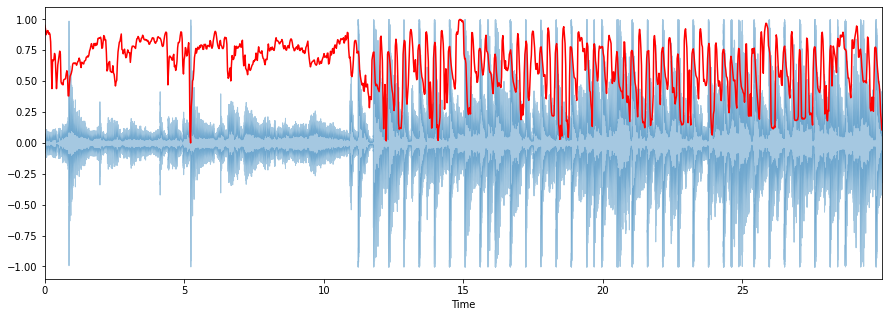

In [ ]:
spectral_rolloff = librosa.feature.spectral_rolloff(x, sr=sr).T
plt.figure(figsize=(15, 5))

librosa.display.waveplot(x, sr=sr, alpha=0.4)
spectral_rolloff_norm = sklearn.preprocessing.minmax_scale(spectral_rolloff, axis=0)
plt.plot(t, spectral_rolloff_norm, color='r')

3 **Спектральная ширина (полоса пропускания)** 

**librosa.feature.spectral_bandwidth** вычисляет спектральную ширину порядка p

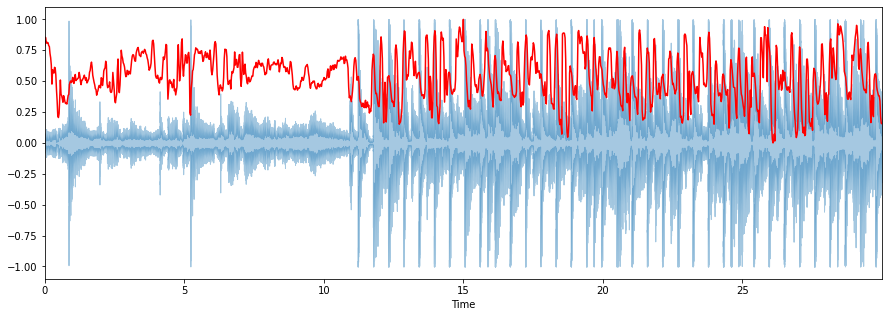

In [ ]:
spectral_bandwidth = librosa.feature.spectral_bandwidth(x, sr=sr).T

plt.figure(figsize=(15, 5))

librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, sklearn.preprocessing.minmax_scale(spectral_bandwidth, axis=0), color='r')

4 **Zero Crossing Rate**

(661504,)


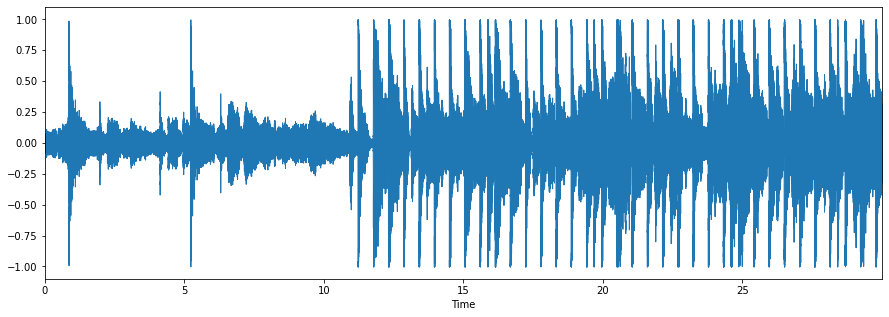

In [ ]:
plt.figure(figsize=(15, 5))
print(x.shape)
librosa.display.waveplot(x, sr=sr)

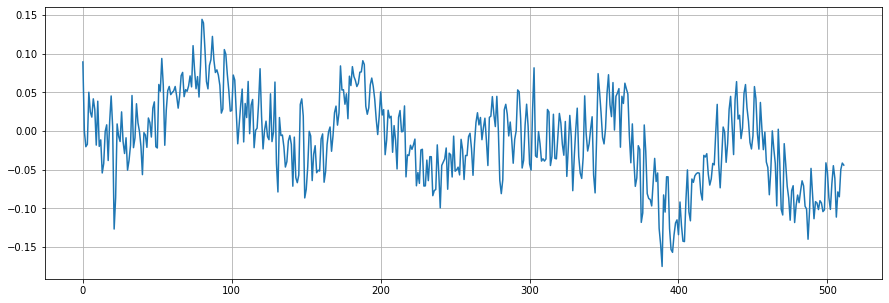

In [ ]:
# Увеличение масштаба:
n0 = 29000
n1 = 29512
plt.figure(figsize=(15, 5))
plt.plot(x[n0:n1])
plt.grid()

In [ ]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(zero_crossings)
print(sum(zero_crossings))

[False  True False False  True False False False False  True  True  True
 False False False False  True  True  True False False  True False  True
  True False  True  True False False False False False  True  True False
  True False  True False False False False False  True False  True  True
 False  True False  True False False False  True  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True  True False False
  True  True False False  True  True False  True  True False False False
 False  True  True False  True False  True  True False  True  True False
  True  True False False False False False False False False False False
 False False  True False False  True False False False False False False
 False False False False False False False False Fa

In [ ]:
zero_crossings = librosa.zero_crossings(x, pad=False)
print(sum(zero_crossings))

101588


5 **Мел-частотные кепстральные коэффициенты (MFCC)**

(20, 1293)


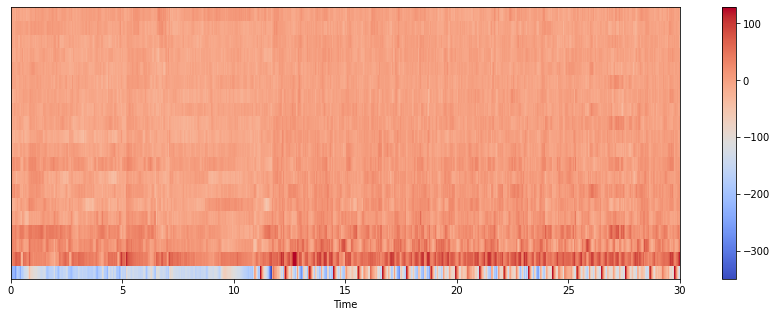

In [ ]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)

plt.figure(figsize=(15, 5))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()

6 **Chroma Feature (признак или вектор цветности)** представлен вектором признаков из 12 элементов, в котором указано количество энергии каждого высотного класса {C, C#, D, D#, E, …, B} в сигнале. Используется для описания меры сходства между музыкальными произведениями.

librosa.feature.chroma_stft используется для вычисления признаков цветности.

(12, 1293)


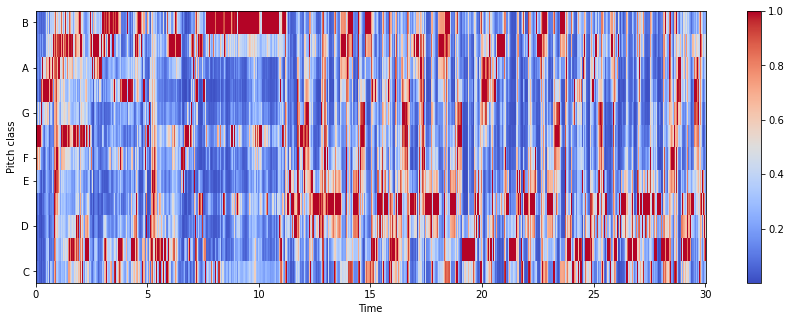

In [ ]:
chromagram = librosa.feature.chroma_stft(x, sr=sr)
print(chromagram.shape)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', cmap='coolwarm')
plt.colorbar()

## Классификация жанров музыки 

### Подготовка данных

In [ ]:
import pandas as pd
import os

[Datasets](https://neurohive.io/ru/datasety/tensorflow-datasets/)

In [ ]:
!pip install -q tfds-nightly tensorflow
!pip install pydub

     |████████████████████████████████| 4.2 MB 4.3 MB/s 
     |████████████████████████████████| 76 kB 4.4 MB/s 
     |████████████████████████████████| 462 kB 35.7 MB/s 


In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf

In [ ]:
ds, info = tfds.load('gtzan', split='train',  with_info=True)

Dataset gtzan downloaded and prepared to ~/tensorflow_datasets/gtzan/1.0.0. Subsequent calls will reuse this data.


[датасет gtzan в TensorFlow Datasets ](https://www.tensorflow.org/datasets/catalog/gtzan)

ds - структура из 1000 словарей, каждый словарь содержит: трек, название трека, жанр к которому относится трек

info - методанные набора данных

In [ ]:
print(ds)
print(info)

<PrefetchDataset element_spec={'audio': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'audio/filename': TensorSpec(shape=(), dtype=tf.string, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>
tfds.core.DatasetInfo(
    name='gtzan',
    full_name='gtzan/1.0.0',
    description="""
    The dataset consists of 1000 audio tracks each 30 seconds long.
    It contains 10 genres, each represented by 100 tracks.
    The tracks are all 22050Hz Mono 16-bit audio files in .wav format.
    
    The genres are:
    
    * blues
    * classical
    * country
    * disco
    * hiphop
    * jazz
    * metal
    * pop
    * reggae
    * rock
    """,
    homepage='http://marsyas.info/index.html',
    data_path='~/tensorflow_datasets/gtzan/1.0.0',
    download_size=1.14 GiB,
    dataset_size=3.71 GiB,
    features=FeaturesDict({
        'audio': Audio(shape=(None,), dtype=tf.int64),
        'audio/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape

In [ ]:
genre_list = info.features['label'].names

In [ ]:
print(genre_list)

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [ ]:
df_ds = tfds.as_dataframe(ds, info)

In [ ]:
df_ds.head()

,audio,audio/filename,label
0,"[-8821, -8083, -6088, -4457, -2639, -1991, -50...",b'pop.00038.wav',7
1,"[-170, -237, -81, 37, -8, 3, 146, 299, 466, 45...",b'classical.00013.wav',1
2,"[-3789, -1596, -925, -1706, -1270, 393, 2340, ...",b'metal.00093.wav',6
3,"[-3236, -2939, -343, -286, -600, 1869, 2548, -...",b'rock.00074.wav',9
4,"[-353, -656, -795, -960, -821, -502, -250, 27,...",b'classical.00004.wav',1


In [ ]:
df_ds.info()

<class 'tensorflow_datasets.core.as_dataframe.StyledDataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   audio           1000 non-null   object
 1   audio/filename  1000 non-null   object
 2   label           1000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [ ]:
type(df_ds['audio'][0][0])

numpy.int64

## Librosa

In [ ]:
df_ds['audio'] = df_ds['audio'].apply(lambda x: x.astype('float32'))

In [ ]:
type(df_ds['audio'][0][0])

numpy.float32

In [ ]:
df_ds.head()

,audio,audio/filename,label
0,"[-8821.0, -8083.0, -6088.0, -4457.0, -2639.0, ...",b'pop.00038.wav',7
1,"[-170.0, -237.0, -81.0, 37.0, -8.0, 3.0, 146.0...",b'classical.00013.wav',1
2,"[-3789.0, -1596.0, -925.0, -1706.0, -1270.0, 3...",b'metal.00093.wav',6
3,"[-3236.0, -2939.0, -343.0, -286.0, -600.0, 186...",b'rock.00074.wav',9
4,"[-353.0, -656.0, -795.0, -960.0, -821.0, -502....",b'classical.00004.wav',1


In [ ]:
df_ds['spectrogram'] = df_ds['audio'].apply(lambda x: librosa.amplitude_to_db(abs(librosa.stft(x))))

In [ ]:
df_ds.head()

,audio,audio/filename,label,spectrogram
0,"[-8821.0, -8083.0, -6088.0, -4457.0, -2639.0, ...",b'pop.00038.wav',7,"[[113.11466, 107.09592, 57.90123, 71.52731, 79..."
1,"[-170.0, -237.0, -81.0, 37.0, -8.0, 3.0, 146.0...",b'classical.00013.wav',1,"[[45.52951, 83.83789, 72.134125, 84.46272, 81...."
2,"[-3789.0, -1596.0, -925.0, -1706.0, -1270.0, 3...",b'metal.00093.wav',6,"[[77.59912, 88.99548, 95.876465, 96.81296, 94...."
3,"[-3236.0, -2939.0, -343.0, -286.0, -600.0, 186...",b'rock.00074.wav',9,"[[104.60947, 102.48828, 97.69062, 86.19454, 93..."
4,"[-353.0, -656.0, -795.0, -960.0, -821.0, -502....",b'classical.00004.wav',1,"[[88.72098, 87.52216, 81.52797, 81.8633, 83.54..."


In [ ]:
df_ds['spectrogram'][0].shape

(1025, 1293)

In [ ]:
df_ds['rms'] = df_ds['spectrogram'].apply(lambda x: librosa.feature.rms(S=x).mean())

In [ ]:
df_ds.head()

,audio,audio/filename,label,spectrogram,rms
0,"[-8821.0, -8083.0, -6088.0, -4457.0, -2639.0, ...",b'pop.00038.wav',7,"[[113.11466, 107.09592, 57.90123, 71.52731, 79...",2.052289
1,"[-170.0, -237.0, -81.0, 37.0, -8.0, 3.0, 146.0...",b'classical.00013.wav',1,"[[45.52951, 83.83789, 72.134125, 84.46272, 81....",1.316460
2,"[-3789.0, -1596.0, -925.0, -1706.0, -1270.0, 3...",b'metal.00093.wav',6,"[[77.59912, 88.99548, 95.876465, 96.81296, 94....",1.823972
3,"[-3236.0, -2939.0, -343.0, -286.0, -600.0, 186...",b'rock.00074.wav',9,"[[104.60947, 102.48828, 97.69062, 86.19454, 93...",1.838344
4,"[-353.0, -656.0, -795.0, -960.0, -821.0, -502....",b'classical.00004.wav',1,"[[88.72098, 87.52216, 81.52797, 81.8633, 83.54...",1.432596


In [ ]:
df_ds['chroma_stft'] = df_ds['audio'].apply(lambda x: librosa.feature.chroma_stft(x).mean())

In [ ]:
df_ds.head()

,audio,audio/filename,label,spectrogram,rms,chroma_stft
0,"[-8821.0, -8083.0, -6088.0, -4457.0, -2639.0, ...",b'pop.00038.wav',7,"[[113.11466, 107.09592, 57.90123, 71.52731, 79...",2.052289,0.400411
1,"[-170.0, -237.0, -81.0, 37.0, -8.0, 3.0, 146.0...",b'classical.00013.wav',1,"[[45.52951, 83.83789, 72.134125, 84.46272, 81....",1.316460,0.232176
2,"[-3789.0, -1596.0, -925.0, -1706.0, -1270.0, 3...",b'metal.00093.wav',6,"[[77.59912, 88.99548, 95.876465, 96.81296, 94....",1.823972,0.444420
3,"[-3236.0, -2939.0, -343.0, -286.0, -600.0, 186...",b'rock.00074.wav',9,"[[104.60947, 102.48828, 97.69062, 86.19454, 93...",1.838344,0.394393
4,"[-353.0, -656.0, -795.0, -960.0, -821.0, -502....",b'classical.00004.wav',1,"[[88.72098, 87.52216, 81.52797, 81.8633, 83.54...",1.432596,0.221574


In [ ]:
df_ds['spec_cent'] = df_ds['audio'].apply(lambda x: librosa.feature.spectral_centroid(x).mean())

In [ ]:
df_ds['spec_bw'] = df_ds['audio'].apply(lambda x: librosa.feature.spectral_bandwidth(x).mean())

In [ ]:
df_ds['rolloff'] = df_ds['audio'].apply(lambda x: librosa.feature.spectral_rolloff(x).mean())

In [ ]:
df_ds['zcr'] = df_ds['audio'].apply(lambda x: librosa.feature.zero_crossing_rate(x).sum())

In [ ]:
df_ds['mfcc'] = df_ds['audio'].apply(lambda x: librosa.feature.mfcc(x).mean(axis=1))


In [ ]:
df_ds.head()

,audio,audio/filename,label,spectrogram,rms,chroma_stft,spec_cent,spec_bw,rolloff,zcr,mfcc
0,"[-8821.0, -8083.0, -6088.0, -4457.0, -2639.0, ...",b'pop.00038.wav',7,"[[113.11466, 107.09592, 57.90123, 71.52731, 79...",2.052289,0.400411,3267.551920,3014.277539,6921.042939,189.428711,"[1006.0031, 59.26007, -1.5902092, 12.556887, 8..."
1,"[-170.0, -237.0, -81.0, 37.0, -8.0, 3.0, 146.0...",b'classical.00013.wav',1,"[[45.52951, 83.83789, 72.134125, 84.46272, 81....",1.316460,0.232176,1387.961803,1456.141132,2598.381478,104.572754,"[678.622, 140.1202, -20.924889, 32.324383, -3...."
2,"[-3789.0, -1596.0, -925.0, -1706.0, -1270.0, 3...",b'metal.00093.wav',6,"[[77.59912, 88.99548, 95.876465, 96.81296, 94....",1.823972,0.444420,2644.696989,2268.001347,5176.728584,183.100098,"[916.75543, 80.717896, -28.533947, 66.8183, -2..."
3,"[-3236.0, -2939.0, -343.0, -286.0, -600.0, 186...",b'rock.00074.wav',9,"[[104.60947, 102.48828, 97.69062, 86.19454, 93...",1.838344,0.394393,2140.289343,2245.944002,4831.439591,117.845215,"[938.3912, 103.88961, -13.957626, 56.895554, -..."
4,"[-353.0, -656.0, -795.0, -960.0, -821.0, -502....",b'classical.00004.wav',1,"[[88.72098, 87.52216, 81.52797, 81.8633, 83.54...",1.432596,0.221574,1705.563259,1646.064010,3174.931743,145.924316,"[761.8146, 118.950165, -35.617496, 31.9637, -1..."


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
df_ds['mfcc'][0]

array([ 1.0060031e+03,  5.9260071e+01, -1.5902092e+00,  1.2556887e+01,
        8.7419519e+00,  3.9735649e+00,  2.0511065e+00,  4.2168093e+00,
        4.9769616e+00,  2.9008915e+00,  2.3292840e+00,  1.9794790e+00,
        1.7142122e+00, -1.5425473e+00, -5.9998286e-01,  3.0277860e-01,
        5.2582757e-03,  2.7650216e+00,  2.2929876e+00,  5.1602416e-02],
      dtype=float32)

In [ ]:
df_1 = pd.DataFrame(df_ds['mfcc'].values.tolist(),)

In [ ]:
df_1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1006.003113,59.260071,-1.590209,12.556887,8.741952,3.973565,2.051106,4.216809,4.976962,2.900892,2.329284,1.979479,1.714212,-1.542547,-0.599983,0.302779,0.005258,2.765022,2.292988,0.051602
1,678.622009,140.120193,-20.924889,32.324383,-3.684866,2.939080,-10.673028,0.310078,-5.799786,7.684967,-3.672434,2.557330,-3.492751,-2.236847,-0.824252,0.882010,0.466464,0.938281,1.867628,-0.634676
2,916.755432,80.717896,-28.533947,66.818298,-20.708839,29.131054,-9.363501,22.357740,-12.051946,13.602470,-14.737642,11.062689,-15.274256,5.316473,-14.498363,4.752530,-11.458050,-0.109690,-6.504650,-2.667148
3,938.391174,103.889610,-13.957626,56.895554,-14.430039,32.196243,-14.127815,19.162758,-9.334485,13.170979,-11.711214,8.413895,-9.387064,10.224671,-4.208460,5.624008,-6.380995,1.797807,-5.574053,-0.445842
4,761.814575,118.950165,-35.617496,31.963699,-16.525827,10.616536,-15.653921,7.417120,-5.822315,8.268574,-17.982004,-1.185530,-6.355774,2.748991,-2.585196,4.403330,-4.125300,-4.787770,-4.774070,-4.603727


In [ ]:
df_2 = df_ds.drop(['audio/filename', 'audio', 'spectrogram', 'mfcc'], axis=1)

In [ ]:
data = pd.concat([df_2, df_1], axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   label        1000 non-null   int64  
 1   rms          1000 non-null   float64
 2   chroma_stft  1000 non-null   float32
 3   spec_cent    1000 non-null   float64
 4   spec_bw      1000 non-null   float64
 5   rolloff      1000 non-null   float64
 6   zcr          1000 non-null   float64
 7   0            1000 non-null   float32
 8   1            1000 non-null   float32
 9   2            1000 non-null   float32
 10  3            1000 non-null   float32
 11  4            1000 non-null   float32
 12  5            1000 non-null   float32
 13  6            1000 non-null   float32
 14  7            1000 non-null   float32
 15  8            1000 non-null   float32
 16  9            1000 non-null   float32
 17  10           1000 non-null   float32
 18  11           1000 non-null   float32
 19  12     

In [ ]:
data.head()

,label,rms,chroma_stft,spec_cent,spec_bw,rolloff,zcr,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,7,2.052289,0.400411,3267.551920,3014.277539,6921.042939,189.428711,1006.003113,59.260071,-1.590209,12.556887,8.741952,3.973565,2.051106,4.216809,4.976962,2.900892,2.329284,1.979479,1.714212,-1.542547,-0.599983,0.302779,0.005258,2.765022,2.292988,0.051602
1,1,1.316460,0.232176,1387.961803,1456.141132,2598.381478,104.572754,678.622009,140.120193,-20.924889,32.324383,-3.684866,2.939080,-10.673028,0.310078,-5.799786,7.684967,-3.672434,2.557330,-3.492751,-2.236847,-0.824252,0.882010,0.466464,0.938281,1.867628,-0.634676
2,6,1.823972,0.444420,2644.696989,2268.001347,5176.728584,183.100098,916.755432,80.717896,-28.533947,66.818298,-20.708839,29.131054,-9.363501,22.357740,-12.051946,13.602470,-14.737642,11.062689,-15.274256,5.316473,-14.498363,4.752530,-11.458050,-0.109690,-6.504650,-2.667148
3,9,1.838344,0.394393,2140.289343,2245.944002,4831.439591,117.845215,938.391174,103.889610,-13.957626,56.895554,-14.430039,32.196243,-14.127815,19.162758,-9.334485,13.170979,-11.711214,8.413895,-9.387064,10.224671,-4.208460,5.624008,-6.380995,1.797807,-5.574053,-0.445842
4,1,1.432596,0.221574,1705.563259,1646.064010,3174.931743,145.924316,761.814575,118.950165,-35.617496,31.963699,-16.525827,10.616536,-15.653921,7.417120,-5.822315,8.268574,-17.982004,-1.185530,-6.355774,2.748991,-2.585196,4.403330,-4.125300,-4.787770,-4.774070,-4.603727


In [ ]:
y = data['label'].values
data_x = data.drop(['label'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [ ]:
# Масштабирование столбцов признаков
scaler = StandardScaler()
X = scaler.fit_transform(data_x.values)

# Разделение данных на обучающий и тестовый набор
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## PyAudioAnalysis

In [ ]:
!git clone https://github.com/tyiannak/pyAudioAnalysis.git

Cloning into 'pyAudioAnalysis'...
remote: Enumerating objects: 2994, done.
remote: Counting objects: 100% (460/460), done.
remote: Compressing objects: 100% (296/296), done.
remote: Total 2994 (delta 209), reused 396 (delta 163), pack-reused 2534
Receiving objects: 100% (2994/2994), 167.81 MiB | 13.74 MiB/s, done.
Resolving deltas: 100% (1770/1770), done.
Checking out files: 100% (276/276), done.


In [ ]:
!pip install -r pyAudioAnalysis//requirements.txt

     |████████████████████████████████| 10.3 MB 4.4 MB/s 
     |████████████████████████████████| 81 kB 1.4 MB/s 
     |████████████████████████████████| 27.4 MB 49.1 MB/s 
     |████████████████████████████████| 15.3 MB 533 kB/s 
     |████████████████████████████████| 369 kB 39.3 MB/s 
     |████████████████████████████████| 245 kB 39.5 MB/s 
     |████████████████████████████████| 22.3 MB 1.3 MB/s 
     |████████████████████████████████| 71 kB 7.4 MB/s 
     |████████████████████████████████| 23.9 MB 52.0 MB/s 
     |████████████████████████████████| 9.9 MB 23.2 MB/s 
     |████████████████████████████████| 242 kB 17.4 MB/s 
  Created wheel for simplejson: filename=simplejson-3.16.0-cp37-cp37m-linux_x86_64.whl size=114876 sha256=ecc165e3bf9816dffdcb134fdf59e10e04eb56083f527ba8de85fde094b01a07
  Stored in directory: /root/.cache/pip/wheels/00/6f/29/109ee3b85a9f9861d4294b05e4597363d5ad3c9dfaccc78787
Successfully built simplejson
  Attempting uninstall: numpy
    Found existing install

In [ ]:
!pip install -e pyAudioAnalysis/.

Obtaining file:///content/pyAudioAnalysis
  Running setup.py develop for pyAudioAnalysis


In [ ]:
from pyAudioAnalysis import audioBasicIO
from pyAudioAnalysis import ShortTermFeatures

In [ ]:
[Fs, x] = audioBasicIO.read_audio_file("pop.00016.wav")
print(Fs, x)

22050 [  45 -231  111 ... 5587 5424 5079]


In [ ]:
ShortTermFeatures.feature_extraction(x, 22050, 0.050*22050, 0.025*22050)[0]

array([[ 1.88919164e-01,  1.21707539e-01,  1.47138965e-01, ...,
         8.81017257e-02,  7.17529519e-02,  5.08628520e-02],
       [ 9.15877664e-04,  1.44427367e-03,  1.16306952e-03, ...,
         2.27040718e-02,  2.97444423e-02,  3.22539361e-02],
       [ 2.80279741e+00,  3.21053847e+00,  3.24122445e+00, ...,
         3.22792124e+00,  3.19394070e+00,  3.16351117e+00],
       ...,
       [ 0.00000000e+00,  1.03274316e-01, -8.17850499e-03, ...,
        -3.31439623e-03,  5.45960826e-04, -1.57954741e-03],
       [ 0.00000000e+00, -1.96196052e-03,  1.36566055e-03, ...,
        -7.78158834e-04,  3.47496475e-04, -5.37481168e-04],
       [ 0.00000000e+00,  2.33077511e-02, -2.07995281e-03, ...,
         6.30565922e-04,  5.24978653e-03, -9.26060490e-04]])

In [ ]:
Feat = df_ds['audio'].apply( lambda x:ShortTermFeatures.feature_extraction(x, 22050, 2000, 1000))

In [ ]:
Feat[0][0]

array([[ 3.30165083e-02,  2.55127564e-02,  5.80290145e-02, ...,
         2.36118059e-01,  2.38119060e-01,  2.37618809e-01],
       [ 2.24035322e-02,  2.15259783e-02,  2.69807037e-02, ...,
         1.12347984e-01,  1.66106098e-02,  4.60789738e-03],
       [ 3.30275371e+00,  3.31441709e+00,  2.68198412e+00, ...,
         2.60483262e+00,  2.87775526e+00,  3.15491832e+00],
       ...,
       [ 0.00000000e+00,  6.40912653e-04,  5.17558328e-03, ...,
        -9.30402162e-03, -8.74528197e-03, -9.38938345e-03],
       [ 0.00000000e+00, -2.30273505e-04,  2.66997801e-03, ...,
         2.30394946e-03,  3.53657693e-03, -6.08099485e-03],
       [ 0.00000000e+00,  6.96082741e-03, -6.90054092e-02, ...,
         8.05393969e-04, -7.82601843e-03,  6.87245325e-05]])

In [ ]:
data_feat = pd.DataFrame(columns=Feat[0][1], index=range(len(Feat)))

In [ ]:
data_feat

,zcr,energy,energy_entropy,spectral_centroid,spectral_spread,spectral_entropy,spectral_flux,spectral_rolloff,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,chroma_1,chroma_2,chroma_3,chroma_4,chroma_5,chroma_6,chroma_7,chroma_8,chroma_9,chroma_10,chroma_11,chroma_12,chroma_std,delta zcr,delta energy,delta energy_entropy,delta spectral_centroid,delta spectral_spread,delta spectral_entropy,delta spectral_flux,delta spectral_rolloff,delta mfcc_1,delta mfcc_2,delta mfcc_3,delta mfcc_4,delta mfcc_5,delta mfcc_6,delta mfcc_7,delta mfcc_8,delta mfcc_9,delta mfcc_10,delta mfcc_11,delta mfcc_12,delta mfcc_13,delta chroma_1,delta chroma_2,delta chroma_3,delta chroma_4,delta chroma_5,delta chroma_6,delta chroma_7,delta chroma_8,delta chroma_9,delta chroma_10,delta chroma_11,delta chroma_12,delta chroma_std
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for i in range(len(Feat)):
  for j in range(len(Feat[i][1])):
    data_feat[Feat[i][1][j]][i] = (sum(Feat[i][0][j]) / len(Feat[i][0][j])).astype('float32')

In [ ]:
data_feat.head()

,zcr,energy,energy_entropy,spectral_centroid,spectral_spread,spectral_entropy,spectral_flux,spectral_rolloff,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,chroma_1,chroma_2,chroma_3,chroma_4,chroma_5,chroma_6,chroma_7,chroma_8,chroma_9,chroma_10,chroma_11,chroma_12,chroma_std,delta zcr,delta energy,delta energy_entropy,delta spectral_centroid,delta spectral_spread,delta spectral_entropy,delta spectral_flux,delta spectral_rolloff,delta mfcc_1,delta mfcc_2,delta mfcc_3,delta mfcc_4,delta mfcc_5,delta mfcc_6,delta mfcc_7,delta mfcc_8,delta mfcc_9,delta mfcc_10,delta mfcc_11,delta mfcc_12,delta mfcc_13,delta chroma_1,delta chroma_2,delta chroma_3,delta chroma_4,delta chroma_5,delta chroma_6,delta chroma_7,delta chroma_8,delta chroma_9,delta chroma_10,delta chroma_11,delta chroma_12,delta chroma_std
0,0.146681,0.055483,3.126877,0.298717,0.275777,1.366704,0.002032,0.297892,-21.738028,1.114182,0.096998,0.340308,0.137636,0.281873,-0.024385,0.135284,0.119196,0.250652,0.161001,0.125067,0.096544,0.028425,0.003926,0.054019,0.030778,0.004655,0.006134,0.034573,0.006596,0.033261,0.007582,0.0203,0.007065,0.030517,0.00031,-0.000027,-0.000224,0.000102,-0.000068,0.003368,0.000001,0.00065,0.002315,-0.003691,-0.001239,-0.000681,-0.00019,-0.001826,-0.000604,-0.000091,-0.000205,0.000521,-0.001164,-0.001711,-0.000295,0.000022,0.000004,-0.000642,-0.000012,0.000012,0.000004,0.000004,0.000005,-0.000002,0.000031,0.000004,0.000002,-0.000168
1,0.081014,0.010058,3.215578,0.139362,0.157603,0.77333,0.003423,0.127483,-26.1297,1.866054,-0.462118,-0.019994,-0.202793,0.238671,-0.102139,-0.10262,-0.032922,0.059121,-0.043988,0.065688,0.080343,0.026128,0.0048,0.010777,0.031987,0.011261,0.025424,0.011245,0.007217,0.008815,0.003896,0.020898,0.016424,0.022331,-0.000012,-0.000021,0.000082,-0.00003,0.000005,-0.0003,0.000003,-0.000012,-0.00498,0.000447,-0.001917,-0.000435,-0.001847,0.00002,-0.000073,-0.00004,-0.000478,-0.001437,-0.000277,0.001379,0.000735,-0.000036,-0.000001,0.000165,0.000078,0.000003,0.000062,-0.000007,-0.000021,0.000013,-0.000005,-0.000102,-0.000057,0.000013
2,0.141993,0.022878,3.097167,0.240635,0.210879,1.191,0.002032,0.265235,-22.730251,1.416006,0.879525,0.311552,0.414195,0.087607,-0.008529,-0.003234,-0.136155,-0.103523,-0.16692,-0.124037,-0.046255,0.036631,0.014084,0.01216,0.034312,0.003579,0.012105,0.024432,0.011838,0.046368,0.01703,0.045098,0.03853,0.032168,0.000042,-0.000007,0.000028,0.000027,0.000033,0.000054,0.000003,0.000052,-0.000473,0.000695,-0.000442,-0.000735,0.000259,0.000001,0.000622,0.000822,0.000553,0.00067,0.000072,-0.000089,0.000003,0.000026,0.000002,-0.00002,-0.000103,-0.000012,0.000002,-0.0,0.000014,0.000016,0.000015,0.000045,0.00001,-0.000014
3,0.091404,0.026236,3.140696,0.203536,0.210814,0.726274,0.00223,0.132353,-22.959356,1.938621,0.46041,0.279412,0.140723,0.21239,0.116259,0.17457,0.133403,-0.058022,-0.053188,0.017017,-0.048049,0.068016,0.016572,0.073501,0.033667,0.005679,0.006484,0.014911,0.009591,0.037554,0.003719,0.015466,0.019837,0.038542,-0.000017,0.000049,-0.000853,-0.000104,-0.00005,-0.000516,0.000002,-0.000147,0.002669,0.000373,0.000619,0.000336,0.000213,0.000502,-0.000132,0.000136,-0.001256,-0.001204,-0.000132,0.000364,0.000487,-0.000118,0.000005,0.000151,0.000096,0.000002,0.000009,0.000047,0.000003,0.000133,0.000003,0.000006,-0.00003,-0.000016
4,0.112967,0.02283,3.238629,0.167603,0.166707,1.068789,0.003614,0.168397,-23.554714,1.133446,-0.560004,0.268766,-0.253047,-0.076677,-0.392726,-0.115341,-0.210057,-0.361065,-0.112332,0.076578,0.107921,0.015264,0.00823,0.014051,0.017489,0.007733,0.010005,0.003746,0.008116,0.007603,0.009447,0.005316,0.008403,0.0157,0.000026,0.000047,-0.000054,0.00008,0.000044,-0.000647,0.000016,-0.000024,0.002348,-0.002728,-0.000975,0.001371,-0.000892,-0.001005,0.000738,-0.000758,-0.000169,0.001179,-0.00058,-0.00122,0.000286,-0.000038,-0.000002,-0.000009,-0.000095,-0.000002,-0.000017,-0.000002,0.000038,-0.000001,-0.000003,-0.000079,-0.000019,-0.000019

In [ ]:
df_ds['spectrogram'] = df_ds['audio'].apply( lambda x: ShortTermFeatures.spectrogram(x, 22050, 0.050*22050, 0.025*22050))

In [ ]:
df_ds['centroid_spread'] = df_ds['audio'].apply( lambda x: ShortTermFeatures.spectral_centroid_spread(x, 22050))

In [ ]:
df_ds['zero'] = df_ds['audio'].apply( lambda x: ShortTermFeatures.zero_crossing_rate(x))

In [ ]:
df_ds['energy'] = df_ds['audio'].apply( lambda x: ShortTermFeatures.energy(x))

In [ ]:
df_ds['energy_entropy'] = df_ds['audio'].apply( lambda x: ShortTermFeatures.energy_entropy(x))

In [ ]:
df_ds['spectral_entropy'] = df_ds['audio'].apply( lambda x: ShortTermFeatures.spectral_entropy(x))

In [ ]:
df_ds['rolloff'] = df_ds['audio'].apply( lambda x: ShortTermFeatures.spectral_rolloff(x, 22050))

In [ ]:
df_ds['chromagram'] = df_ds['audio'].apply( lambda x: ShortTermFeatures.chromagram(x, 22050, 22050, 22050))

In [ ]:
df_ds.head()

,audio,audio/filename,label,centroid_spread,zero,energy,energy_entropy,spectral_entropy,rolloff
0,"[-8821, -8083, -6088, -4457, -2639, -1991, -50...",b'pop.00038.wav',7,"(0.624764467325218, 0.26062697254044764)",0.146745,5.946567e+07,3.316260,3.316260,0.0
1,"[-170, -237, -81, 37, -8, 3, 146, 299, 466, 45...",b'classical.00013.wav',1,"(0.5285665418314669, 0.2703064084249135)",0.080994,1.814732e+06,2.571906,2.571906,0.0
2,"[-3789, -1596, -925, -1706, -1270, 393, 2340, ...",b'metal.00093.wav',6,"(0.4951447858230318, 0.2884044274951375)",0.141865,9.551440e+06,3.304714,3.304714,0.0
3,"[-3236, -2939, -343, -286, -600, 1869, 2548, -...",b'rock.00074.wav',9,"(0.5594130407073599, 0.26953945568526166)",0.091276,2.753497e+07,3.271320,3.271320,0.0
4,"[-353, -656, -795, -960, -821, -502, -250, 27,...",b'classical.00004.wav',1,"(0.4962780007522584, 0.2906301460391822)",0.113017,2.148376e+06,3.296991,3.296991,0.0


In [ ]:
df_2 = df_ds.drop(['audio/filename', 'audio', 'centroid_spread'], axis=1)

In [ ]:
df_2.head()

,label,zero,energy,energy_entropy,spectral_entropy,rolloff
0,7,0.146745,5.946567e+07,3.316260,3.316260,0.0
1,1,0.080994,1.814732e+06,2.571906,2.571906,0.0
2,6,0.141865,9.551440e+06,3.304714,3.304714,0.0
3,9,0.091276,2.753497e+07,3.271320,3.271320,0.0
4,1,0.113017,2.148376e+06,3.296991,3.296991,0.0


In [ ]:
df_1 = pd.DataFrame(df_ds['centroid_spread'].values.tolist(),)

In [ ]:
df_1.head()

,0,1
0,0.624764,0.260627
1,0.528567,0.270306
2,0.495145,0.288404
3,0.559413,0.269539
4,0.496278,0.290630


In [ ]:
data = pd.concat([df_2, df_1], axis=1)

In [ ]:
y = data['label'].values
data_x = data.drop(['label', 1], axis=1)

In [ ]:
data_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   zero              1000 non-null   float64
 1   energy            1000 non-null   float64
 2   energy_entropy    1000 non-null   float64
 3   spectral_entropy  1000 non-null   float64
 4   rolloff           1000 non-null   float64
 5   0                 1000 non-null   float64
dtypes: float64(6)
memory usage: 47.0 KB


In [ ]:
# Масштабирование столбцов признаков
scaler = StandardScaler()
X = scaler.fit_transform(data_x.values)

# Разделение данных на обучающий и тестовый набор
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_feat, df_ds['label'].values, test_size=0.2)

### Построение моделей

In [ ]:
#создаем, обучаем и оцениваем классификатор на основе модели логистической регрессии
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)
scorel_lr = model_lr.score(X_test, y_test)
print(scorel_lr)

0.495


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
#создаем, обучаем и оцениваем классификатор на основе нейронной сети 
model_nn = tf.keras.models.Sequential([
  tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model_nn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_nn.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=128,
)

In [ ]:
test_loss, test_acc = model_nn.evaluate(X_test, y_test, batch_size=128)
print(test_acc)

2/2 [==============================] - 0s 7ms/step - loss: 1.7729 - accuracy: 0.3800
0.3799999952316284


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


In [ ]:
X_test.shape

(200, 6)

In [ ]:
predicts = model_nn.predict(X_test)
d = [np.argmax(predicts[i]) for i in range(len(predicts)) ]
print(list(zip(d, y_test)))


[(0, 9), (1, 1), (1, 1), (0, 4), (6, 3), (8, 6), (9, 3), (5, 3), (1, 0), (7, 7), (7, 4), (1, 1), (6, 6), (0, 0), (8, 8), (6, 6), (7, 3), (3, 2), (4, 9), (6, 3), (7, 6), (6, 6), (6, 9), (6, 4), (5, 5), (3, 3), (5, 2), (6, 4), (0, 0), (8, 3), (2, 2), (8, 8), (6, 8), (5, 0), (8, 1), (3, 9), (9, 9), (1, 1), (5, 5), (3, 9), (0, 0), (7, 6), (9, 6), (7, 3), (8, 4), (7, 6), (1, 9), (2, 2), (7, 7), (0, 5), (7, 7), (3, 3), (6, 0), (5, 5), (7, 4), (1, 1), (3, 9), (1, 5), (8, 3), (2, 2), (5, 8), (9, 8), (1, 8), (0, 4), (1, 1), (8, 8), (5, 5), (3, 8), (3, 9), (7, 7), (7, 9), (4, 4), (1, 5), (4, 0), (5, 5), (8, 0), (9, 8), (0, 2), (7, 6), (9, 9), (3, 3), (3, 2), (3, 6), (1, 1), (6, 5), (1, 1), (0, 0), (5, 2), (1, 1), (0, 3), (8, 8), (3, 0), (7, 4), (0, 9), (3, 9), (1, 1), (7, 6), (8, 9), (6, 6), (7, 6), (4, 7), (8, 3), (3, 3), (6, 6), (9, 6), (3, 9), (6, 0), (8, 5), (6, 0), (0, 0), (6, 6), (3, 3), (3, 4), (1, 5), (5, 5), (8, 5), (0, 0), (1, 1), (7, 6), (1, 2), (1, 1), (8, 3), (3, 3), (1, 5), (4, 4),

In [ ]:
model_nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               1792      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 43,594
Trainable params: 43,594
Non-trainable params: 0
_________________________________________________________________


In [ ]:
accuracy_PAA2 = test_acc

# Результаты

In [ ]:
accuracy_PAA

0.44999998807907104

In [ ]:
accuracy_PAA2

0.3799999952316284

In [ ]:
accuracy_1000

0.675000011920929

In [ ]:
accuracy_500

0.6399999856948853